## Using Kmean technique to cluster the Data according to Announced Cost 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

# Folder path containing the XLSX files
folder_path = '/Users/kalyan/Library/CloudStorage/OneDrive-IIMVIZAG/Python-Exercise-KK/Kalyan-Jupyter-Notebooks/Capex/raw_data/'

filename_1 = "Announced_Cost_2014-22.xlsx"
file_path_1 = os.path.join(folder_path, filename_1)
#reading the excel file
# df = pd.read_excel(r"C:\Users\hp\Documents\Intern_IIMV\Announced_Cost_2014-22.xlsx")
df = pd.read_excel(file_path_1)

df

,State,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,Andhra Pradesh,5769743.1,6263311.9,6185588.5,5817653.3,5694277.6,7215428.0,4823946.1,5487457.5,7467074.8
1,Arunachal Pradesh,2953228.6,1862158.7,1923114.0,1155806.2,1111934.3,1134206.2,981495.2,1954029.7,1942538.6
2,Assam,641579.2,423424.3,903055.4,1174420.9,1042662.4,1083368.0,332802.2,357097.1,478611.1
3,Bihar,1374811.3,1357349.8,1370227.0,1182621.3,712217.2,561696.0,384374.5,365874.4,243069.4
4,Chhattisgarh,1542557.9,1690944.1,1090042.3,1069841.0,1102243.4,1116532.0,1136075.9,1186311.6,1067294.8
5,NCT of Delhi,1093630.0,1295290.8,977299.2,706272.1,600571.0,667413.5,645027.2,613706.2,546466.6
6,Goa,77768.9,213372.2,235390.4,216661.8,233943.6,221437.0,58830.5,48465.4,33167.3
7,Gujarat,6917059.1,5884393.1,5654400.4,4439972.0,4737960.5,5538825.9,4874084.4,7769011.3,7385762.0
8,Haryana,2661708.7,2980930.3,2759519.9,1442240.1,892366.0,3045580.0,3021628.7,877474.8,648160.7
9,Himachal Pradesh,830590.8,877347.0,538415.2,488870.1,383542.2,290263.6,282125.7,269866.3,325898.2


In [3]:
#defining column names and removing unnecessary rows 
df.columns =['State', 'Announced 14-15', 'Announced 15-16', 'Announced 16-17','Announced 17-18','Announced 18-19','Announced 19-20','Announced 20-21','Announced 21-22','Announced 22-23']
drop = [36, 37, 38]
valid_rows = [idx for idx in drop if idx < len(df)]
df= df.drop(df.index[valid_rows])

In [4]:
#check if null is present
df.isnull().sum().sort_values(ascending = False)

State              0
Announced 14-15    0
Announced 15-16    0
Announced 16-17    0
Announced 17-18    0
Announced 18-19    0
Announced 19-20    0
Announced 20-21    0
Announced 21-22    0
Announced 22-23    0
dtype: int64

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# Kmeans algorithm aims to minimize the within-cluster sum of squares, defining no.of clusters as 3
km = KMeans(n_clusters=3)
x  = df.drop("State", axis='columns')
y_predict = km.fit_predict(x)
y_predict

array([1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [6]:
df['cluster'] = y_predict
df.head()
#adding a new column names cluster for the predicted class

,State,Announced 14-15,Announced 15-16,Announced 16-17,Announced 17-18,Announced 18-19,Announced 19-20,Announced 20-21,Announced 21-22,Announced 22-23,cluster
0,Andhra Pradesh,5769743.1,6263311.9,6185588.5,5817653.3,5694277.6,7215428.0,4823946.1,5487457.5,7467074.8,1
1,Arunachal Pradesh,2953228.6,1862158.7,1923114.0,1155806.2,1111934.3,1134206.2,981495.2,1954029.7,1942538.6,0
2,Assam,641579.2,423424.3,903055.4,1174420.9,1042662.4,1083368.0,332802.2,357097.1,478611.1,2
3,Bihar,1374811.3,1357349.8,1370227.0,1182621.3,712217.2,561696.0,384374.5,365874.4,243069.4,2
4,Chhattisgarh,1542557.9,1690944.1,1090042.3,1069841.0,1102243.4,1116532.0,1136075.9,1186311.6,1067294.8,0


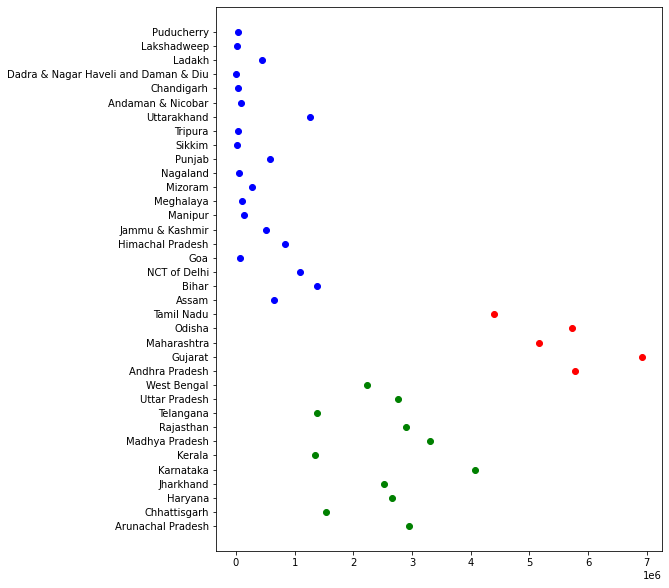

In [7]:
#plotting a scttered plot based on cluster group
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.figure(figsize=(8,10))
plt.scatter(df1['Announced 14-15'],df1['State'], color ='green')
plt.scatter(df2['Announced 14-15'],df2['State'], color ='red')
plt.scatter(df3['Announced 14-15'],df3['State'], color ='blue')


In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Announced 14-15', 'Announced 15-16', 'Announced 16-17','Announced 17-18','Announced 18-19','Announced 19-20','Announced 20-21','Announced 21-22','Announced 22-23']])
df[['Announced 14-15', 'Announced 15-16', 'Announced 16-17','Announced 17-18','Announced 18-19','Announced 19-20','Announced 20-21','Announced 21-22','Announced 22-23']] = scaler.transform(df[['Announced 14-15', 'Announced 15-16', 'Announced 16-17','Announced 17-18','Announced 18-19','Announced 19-20','Announced 20-21','Announced 21-22','Announced 22-23']])
df

,State,Announced 14-15,Announced 15-16,Announced 16-17,Announced 17-18,Announced 18-19,Announced 19-20,Announced 20-21,Announced 21-22,Announced 22-23,cluster
0,Andhra Pradesh,0.834052,0.798423,0.713168,0.626942,0.863230,1.000000,0.790744,0.705636,0.870089,1
1,Arunachal Pradesh,0.426672,0.236944,0.221325,0.123533,0.167263,0.156189,0.158267,0.249757,0.226065,0
2,Assam,0.092315,0.053397,0.103621,0.125543,0.156742,0.149135,0.051490,0.043722,0.055408,2
3,Bihar,0.198370,0.172543,0.157528,0.126429,0.106554,0.076749,0.059979,0.044855,0.027950,2
4,Chhattisgarh,0.222633,0.215102,0.125198,0.114250,0.165791,0.153736,0.183711,0.150707,0.124034,0
5,NCT of Delhi,0.157700,0.164626,0.112188,0.074990,0.089597,0.091418,0.102884,0.076830,0.063318,2
6,Goa,0.010766,0.026600,0.026580,0.022119,0.033913,0.029536,0.006394,0.003903,0.003480,2
7,Gujarat,1.000000,0.750083,0.651875,0.478173,0.717984,0.767360,0.798997,1.000000,0.860610,1
8,Haryana,0.384507,0.379672,0.317837,0.154463,0.133915,0.421405,0.494078,0.110861,0.075173,0
9,Himachal Pradesh,0.119654,0.111307,0.061546,0.051514,0.056634,0.039086,0.043149,0.032468,0.037605,2


In [9]:
x  = df.drop("State", axis='columns')
x = x.drop("cluster", axis='columns')
y_predict = km.fit_predict(x)
y_predict

array([1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
df['cluster'] = y_predict
df.head()

,State,Announced 14-15,Announced 15-16,Announced 16-17,Announced 17-18,Announced 18-19,Announced 19-20,Announced 20-21,Announced 21-22,Announced 22-23,cluster
0,Andhra Pradesh,0.834052,0.798423,0.713168,0.626942,0.863230,1.000000,0.790744,0.705636,0.870089,1
1,Arunachal Pradesh,0.426672,0.236944,0.221325,0.123533,0.167263,0.156189,0.158267,0.249757,0.226065,2
2,Assam,0.092315,0.053397,0.103621,0.125543,0.156742,0.149135,0.051490,0.043722,0.055408,0
3,Bihar,0.198370,0.172543,0.157528,0.126429,0.106554,0.076749,0.059979,0.044855,0.027950,0
4,Chhattisgarh,0.222633,0.215102,0.125198,0.114250,0.165791,0.153736,0.183711,0.150707,0.124034,2


In [11]:
#Calculating sum of square error
k_rng = range(1,10)
ssl = []
for k in k_rng:
    km = KMeans(n_clusters =k)
    km.fit(x)
    ssl.append(km.inertia_)
ssl

[22.403023256656674,
 5.308771797286957,
 2.415406921926806,
 1.61366345822469,
 1.2245814363562286,
 0.9227451271464321,
 0.7429528463992553,
 0.5838345728780406,
 0.45030764858468786]

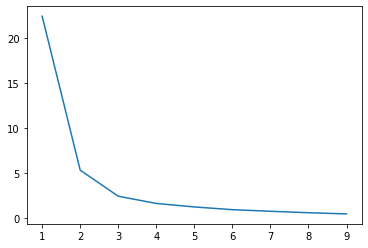

In [12]:
#plot b/w k-range and Sum of square error
plt.plot(k_rng,ssl)

In [14]:
#States sorted based on cluster group
y = df[['State', 'cluster']]
y= y.sort_values('cluster')
y

,State,cluster
17,Meghalaya,0
33,Ladakh,0
32,Dadra & Nagar Haveli and Daman & Diu,0
31,Chandigarh,0
30,Andaman & Nicobar,0
28,Uttarakhand,0
26,Tripura,0
23,Sikkim,0
21,Punjab,0
19,Nagaland,0
